ขึ้นตอนหา Mean และ Std ของแบบสอบถามใน Unity ของแต่ละ Character_Status 

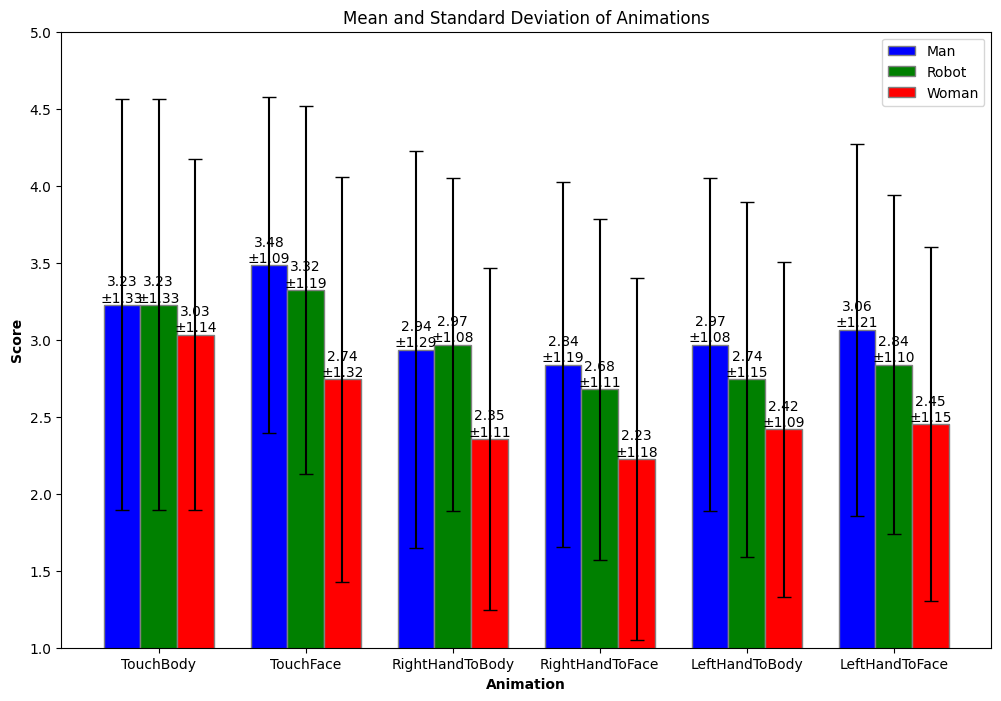

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data files
man_avatar = pd.read_csv('Questionnair/Man Avatar.csv')
robot_avatar = pd.read_csv('Questionnair/Robot Avatar.csv')
woman_avatar = pd.read_csv('Questionnair/Woman Avatar.csv')

# Calculate mean and standard deviation for each dataframe
man_stats = man_avatar.describe().loc[['mean', 'std']]
robot_stats = robot_avatar.describe().loc[['mean', 'std']]
woman_stats = woman_avatar.describe().loc[['mean', 'std']]

# Combine stats into a single dataframe for displaying
man_stats['Avatar'] = 'Man'
robot_stats['Avatar'] = 'Robot'
woman_stats['Avatar'] = 'Woman'
combined_stats = pd.concat([man_stats, robot_stats, woman_stats]).reset_index()

# Clean combined stats for plotting
combined_stats_cleaned = combined_stats.set_index(['Avatar', 'index']).T

# Extracting the necessary data
man_means = combined_stats_cleaned['Man', 'mean']
man_stds = combined_stats_cleaned['Man', 'std']
robot_means = combined_stats_cleaned['Robot', 'mean']
robot_stds = combined_stats_cleaned['Robot', 'std']
woman_means = combined_stats_cleaned['Woman', 'mean']
woman_stds = combined_stats_cleaned['Woman', 'std']

# Plot the data with mean and standard deviation displayed on the bars clearly
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width
bar_width = 0.25

# Set positions of bars on X axis
r1 = range(len(man_means))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot
bars1 = ax.bar(r1, man_means, color='b', width=bar_width, edgecolor='grey', label='Man')
bars2 = ax.bar(r2, robot_means, color='g', width=bar_width, edgecolor='grey', label='Robot')
bars3 = ax.bar(r3, woman_means, color='r', width=bar_width, edgecolor='grey', label='Woman')

# Add error bars
ax.errorbar(r1, man_means, yerr=man_stds, fmt='none', capsize=5, color='black')
ax.errorbar(r2, robot_means, yerr=robot_stds, fmt='none', capsize=5, color='black')
ax.errorbar(r3, woman_means, yerr=woman_stds, fmt='none', capsize=5, color='black')

# Add xticks on the middle of the group bars
ax.set_xlabel('Animation', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(man_means))])
ax.set_xticklabels(man_means.index)

# Adjust Y-axis scale to 1-5
ax.set_ylim(1, 5)

# Add text for mean and std
for bars, means, stds in zip([bars1, bars2, bars3], [man_means, robot_means, woman_means], [man_stds, robot_stds, woman_stds]):
    for bar, mean, std in zip(bars, means, stds):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{mean:.2f}\n±{std:.2f}', ha='center', va='bottom', fontsize=10)

# Create legend & Show graphic
plt.title('Mean and Standard Deviation of Animations')
plt.legend()
plt.show()



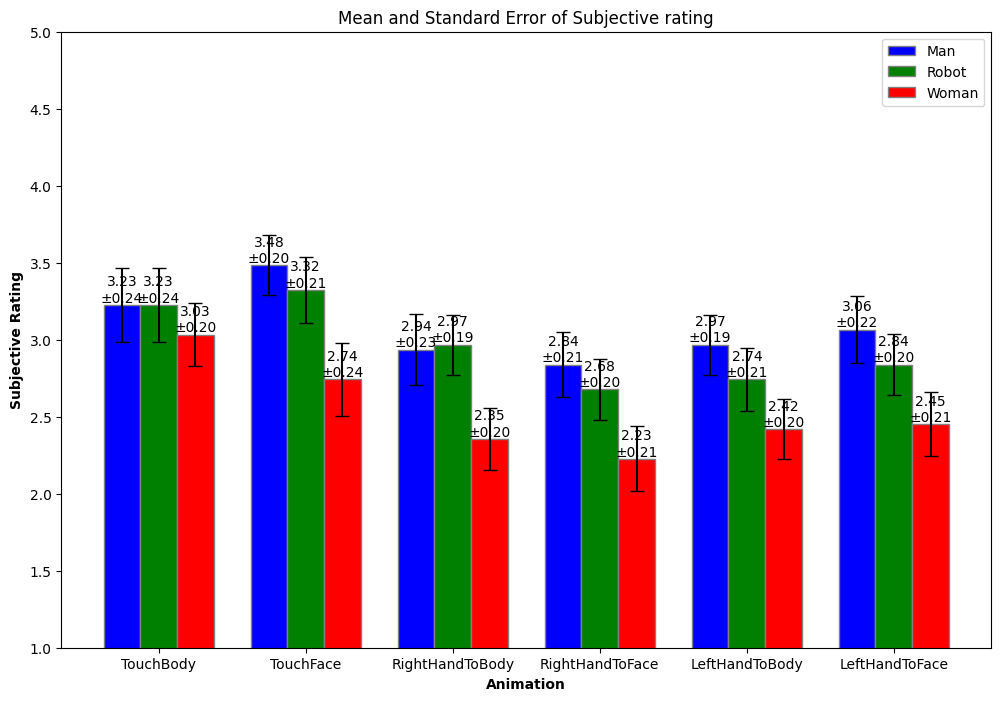

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data files
man_avatar = pd.read_csv('Questionnair/Man Avatar.csv')
robot_avatar = pd.read_csv('Questionnair/Robot Avatar.csv')
woman_avatar = pd.read_csv('Questionnair/Woman Avatar.csv')

# Calculate mean and standard error for each dataframe
man_stats = man_avatar.describe().loc[['mean']]
man_stats.loc['std_error'] = man_avatar.sem()

robot_stats = robot_avatar.describe().loc[['mean']]
robot_stats.loc['std_error'] = robot_avatar.sem()

woman_stats = woman_avatar.describe().loc[['mean']]
woman_stats.loc['std_error'] = woman_avatar.sem()

# Combine stats into a single dataframe for displaying
man_stats['Avatar'] = 'Man'
robot_stats['Avatar'] = 'Robot'
woman_stats['Avatar'] = 'Woman'
combined_stats = pd.concat([man_stats, robot_stats, woman_stats]).reset_index()

# Clean combined stats for plotting
combined_stats_cleaned = combined_stats.set_index(['Avatar', 'index']).T

# Extracting the necessary data
man_means = combined_stats_cleaned['Man', 'mean']
man_stds = combined_stats_cleaned['Man', 'std_error']
robot_means = combined_stats_cleaned['Robot', 'mean']
robot_stds = combined_stats_cleaned['Robot', 'std_error']
woman_means = combined_stats_cleaned['Woman', 'mean']
woman_stds = combined_stats_cleaned['Woman', 'std_error']

# Plot the data with mean and standard error displayed on the bars clearly
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width
bar_width = 0.25

# Set positions of bars on X axis
r1 = range(len(man_means))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot
bars1 = ax.bar(r1, man_means, color='b', width=bar_width, edgecolor='grey', label='Man')
bars2 = ax.bar(r2, robot_means, color='g', width=bar_width, edgecolor='grey', label='Robot')
bars3 = ax.bar(r3, woman_means, color='r', width=bar_width, edgecolor='grey', label='Woman')

# Add error bars
ax.errorbar(r1, man_means, yerr=man_stds, fmt='none', capsize=5, color='black')
ax.errorbar(r2, robot_means, yerr=robot_stds, fmt='none', capsize=5, color='black')
ax.errorbar(r3, woman_means, yerr=woman_stds, fmt='none', capsize=5, color='black')

# Add xticks on the middle of the group bars
ax.set_xlabel('Animation', fontweight='bold')
ax.set_ylabel('Subjective Rating', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(man_means))])
ax.set_xticklabels(man_means.index)
ax.set_ylim(1, 5)  # Set Y-axis scale from 1 to 5

# Add text for mean and std error
for bars, means, stds in zip([bars1, bars2, bars3], [man_means, robot_means, woman_means], [man_stds, robot_stds, woman_stds]):
    for bar, mean, std in zip(bars, means, stds):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{mean:.2f}\n±{std:.2f}', ha='center', va='bottom', fontsize=10)

# Create legend & Show graphic
plt.title('Mean and Standard Error of Subjective rating')
plt.legend()
plt.show()




จากผู้เข้าร่วมทดลองทั้งหมด 31 คน เป็นชาย 19 คน และ หญิง 12 คน
ผลสรุปได้ว่า จากแบบสอบถามในขณะเล่นเกมพบว่า
Man 
1.เมื่อ Avatar "Man" ทำท่าทางการจับใบหน้าด้วยสองมือ "TouchFace" จะมีความไม่สบายใจสูงที่สุดโดยมีค่าเฉลี่ยอยู่ที่ 3.48 และ Std error อยู่ที่ +-0.2
2.เมื่อ Avatar "Man" ทำท่าทางการจับตัวด้วยสองมือ "TouchBody" จะมีความไม่สบายใจสูงสุดรองลงมาโดยมีค่าเฉลี่ยอยู่ที่ 3.23 และ Std error อยู่ที่ +-0.24
3.Avatar "Man" เป็นสิ่งที่คนส่วนใหญ่กลัวมากที่สุดจากที่เห็นได้จากกราฟแท่ง ในหลายๆ Animation Avatar "Man" จะเป็นตัวละครที่ ผู้เข้าร่วมทดลองมีระดับความไม่สบายใจมากที่สุด

Robot
1.เมื่อ Avatar "Robot" ทำท่าทางการจับใบหน้าด้วยสองมือ "TouchFace" จะมีความไม่สบายใจสูงที่สุดโดยมีค่าเฉลี่ยอยู่ที่ 3.32 และ Std error อยู่ที่ +-0.21
2.เมื่อ Avatar "Robot" ทำท่าทางการจับตัวด้วยสองมือ "TouchBody" จะมีความไม่สบายใจสูงสุดรองลงมาโดยมีค่าเฉลี่ยอยู่ที่ 3.23 และ Std error อยู่ที่ +-0.24
4.Avatar "Robot" เป็นสิ่งที่คนส่วนใหญ่รู้สึกไม่สบายใจรองลงมาจากที่เห็นได้จากกราฟแท่ง ในหลายๆ Animation Avatar "Robot" จะเป็นตัวละครที่ ผู้เข้าร่วมทดลองมีระดับความไม่สบายใจรองลงมา

Woman
1.Avatar "Woman" เป็นสิ่งที่คนส่วนใหญ่รู้สึกไม่สบายใจน้อยที่สุดมาจากที่เห็นได้จากกราฟแท่ง ในหลายๆ Animation Avatar "Woman" จะเป็นตัวละครที่ ผู้เข้าร่วมทดลองมีระดับความไม่สบายใจน้อยที่สุด
2.เมื่อ Avatar "Woman" ทำท่าทางการจับใบหน้าด้วยสองมือ "TouchBody" จะมีความไม่สบายใจสูงที่สุดโดยมีค่าเฉลี่ยอยู่ที่ 3.03 และ Std error อยู่ที่ +-0.20
3.เมื่อ Avatar "Woman" ทำท่าทางการจับใบหน้าด้วยสองมือ "TouchFace" จะมีความไม่สบายใจสูงที่สุดโดยมีค่าเฉลี่ยอยู่ที่ 2.74 และ Std error อยู่ที่ +-0.24





In [21]:
import pandas as pd
import os

# Path to the folder containing the files
folder_path = 'MergeFile/'

# List to hold dataframes
dataframes = []

# Loop through each file from 0000 to 0030 and read them into dataframes
for i in range(31):
    for character in ['Man', 'Robot', 'Woman']:
        file_name = f'{str(i).zfill(4)}_{character}.csv'
        file_path = os.path.join(folder_path, file_name)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            dataframes.append(df)

# Concatenate all dataframes into one
all_data = pd.concat(dataframes, ignore_index=True)

# Check the unique values in Character_status
print(all_data['Character_status'].unique())      


[nan 'RightHandToBody' 'TouchBody' 'LetfHandToBody' 'LeftHandToFace'
 'TouchFace' 'RightHandToFace']


In [22]:
# List to hold dataframes
dataframes = {'Man': [], 'Robot': [], 'Woman': []}

# Loop through each file from 0000 to 0030 and read them into dataframes
for i in range(31):
    for character in ['Man', 'Robot', 'Woman']:
        file_name = f'{str(i).zfill(4)}_{character}.csv'
        file_path = os.path.join(folder_path, file_name)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['Participant'] = str(i).zfill(4)
            dataframes[character].append(df)

# Concatenate dataframes for each character type
all_data = {character: pd.concat(dfs, ignore_index=True) for character, dfs in dataframes.items()}

# Calculate mean HRV_LFHF for each participant and Character_status
mean_values = {character: df.groupby(['Participant', 'Character_status'])['HRV_LFHF'].mean().unstack().reset_index() for character, df in all_data.items()}

# Save to CSV files
output_paths = {}
for character, df in mean_values.items():
    output_path = f'mean_HRV_LFHF_{character}.csv'
    df.to_csv(output_path, index=False)
    output_paths[character] = output_path

# Display the mean values for 'Man' as a sample
print(mean_values['Man'])
print(output_paths)



Character_status Participant  LeftHandToFace  LetfHandToBody  RightHandToBody  \
0                       0000        0.706033        0.815902         0.582856   
1                       0001        1.113329        1.592369         1.845391   
2                       0002        8.565983        2.912675         4.037922   
3                       0003        2.344671        3.229243         3.766534   
4                       0004        1.872751        0.875515         1.000048   
5                       0005        5.287365        6.801935         4.546735   
6                       0006        2.178921        9.400940         6.665757   
7                       0007        1.500071        1.833562         2.880960   
8                       0008        1.857798        7.642637         7.517052   
9                       0009        1.178885        0.738748         0.902740   
10                      0010        5.908062        2.209167         3.001278   
11                      0011

In [23]:
import pandas as pd

# Load the data files
man_df = pd.read_csv('MeanLFHF/mean_HRV_LFHF_Man.csv')
robot_df = pd.read_csv('MeanLFHF/mean_HRV_LFHF_Robot.csv')
woman_df = pd.read_csv('MeanLFHF/mean_HRV_LFHF_Woman.csv')

# Display the dataframes to understand their structure
man_df.head(), robot_df.head(), woman_df.head()


(   Participant  LeftHandToFace  LetfHandToBody  RightHandToBody  \
 0            0        0.706033        0.815902         0.582856   
 1            1        1.113329        1.592369         1.845391   
 2            2        8.565983        2.912675         4.037922   
 3            3        2.344671        3.229243         3.766534   
 4            4        1.872751        0.875515         1.000048   
 
    RightHandToFace  TouchBody  TouchFace  
 0         0.723883   0.612614   0.644704  
 1         1.669386   1.285832   0.968104  
 2         8.014154   4.651175   6.074169  
 3         1.030860   2.580943   1.692727  
 4         0.843638   0.865885   1.793422  ,
    Participant  LeftHandToFace  LetfHandToBody  RightHandToBody  \
 0            0        2.064878        1.000221         0.906658   
 1            1        1.051497        0.275964         0.936126   
 2            2        3.422168        4.578597         3.017582   
 3            3        1.633762        5.584256      

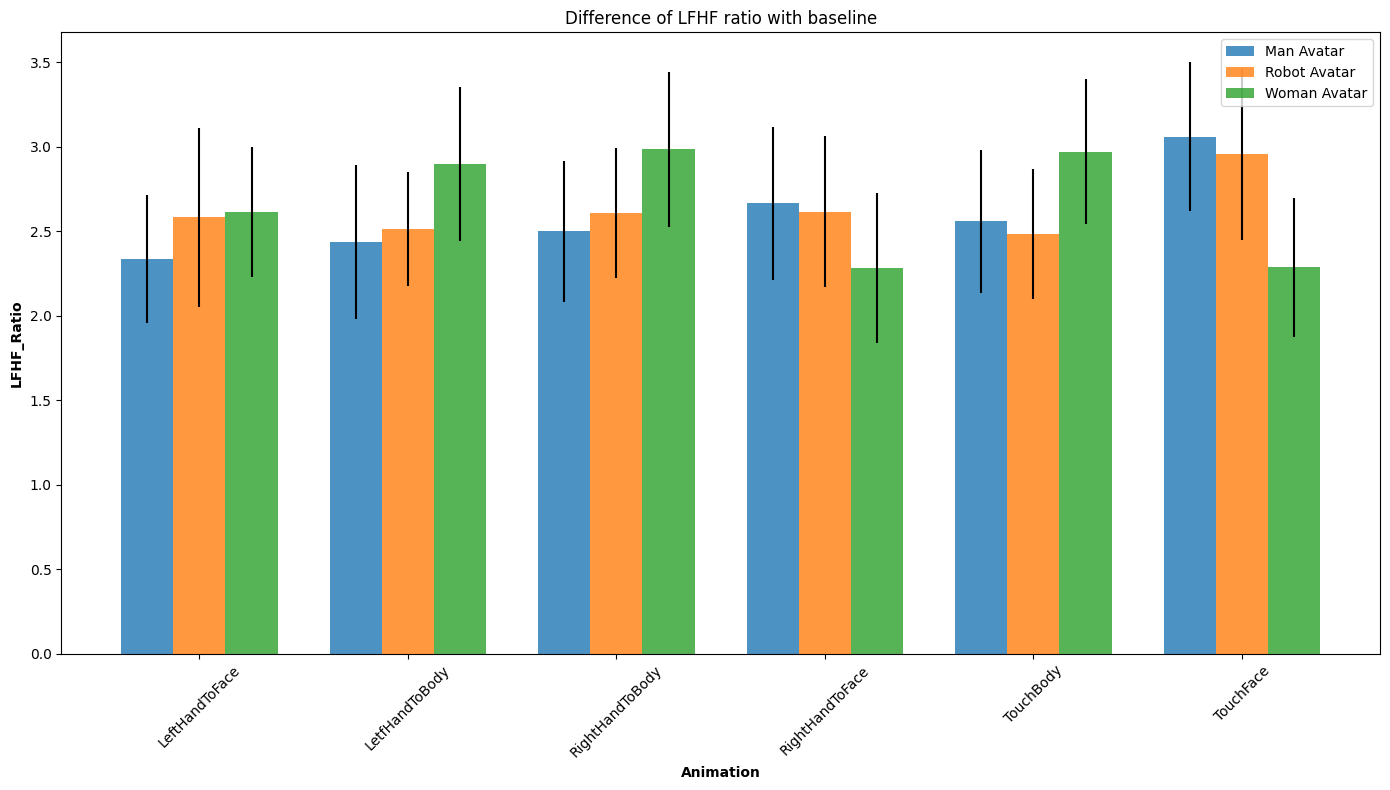

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data files
man_df = pd.read_csv('MeanLFHF/mean_HRV_LFHF_Man.csv')
robot_df = pd.read_csv('MeanLFHF/mean_HRV_LFHF_Robot.csv')
woman_df = pd.read_csv('MeanLFHF/mean_HRV_LFHF_Woman.csv')

# Display the dataframes to understand their structure
man_df.head(), robot_df.head(), woman_df.head()

# Calculate mean and standard error for each gesture for each avatar
man_stats = man_df.drop(columns='Participant').agg(['mean', 'sem']).transpose()
robot_stats = robot_df.drop(columns='Participant').agg(['mean', 'sem']).transpose()
woman_stats = woman_df.drop(columns='Participant').agg(['mean', 'sem']).transpose()

# Create bar graphs for mean HRV_LFHF with error bars
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.25
opacity = 0.8

# Positions of the bars on the x-axis
r1 = range(len(man_stats))
r2 = [p + bar_width for p in r1]
r3 = [p + bar_width * 2 for p in r1]

bars1 = ax.bar(r1, man_stats['mean'], bar_width, yerr=man_stats['sem'], label='Man Avatar', alpha=opacity)
bars2 = ax.bar(r2, robot_stats['mean'], bar_width, yerr=robot_stats['sem'], label='Robot Avatar', alpha=opacity)
bars3 = ax.bar(r3, woman_stats['mean'], bar_width, yerr=woman_stats['sem'], label='Woman Avatar', alpha=opacity)

ax.set_xlabel('Animation',fontweight = 'bold')
ax.set_ylabel('LFHF_Ratio' ,fontweight = 'bold')
ax.set_title('Difference of LFHF ratio with baseline')
ax.set_xticks([p + bar_width for p in range(len(man_stats))])
ax.set_xticklabels(man_stats.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()




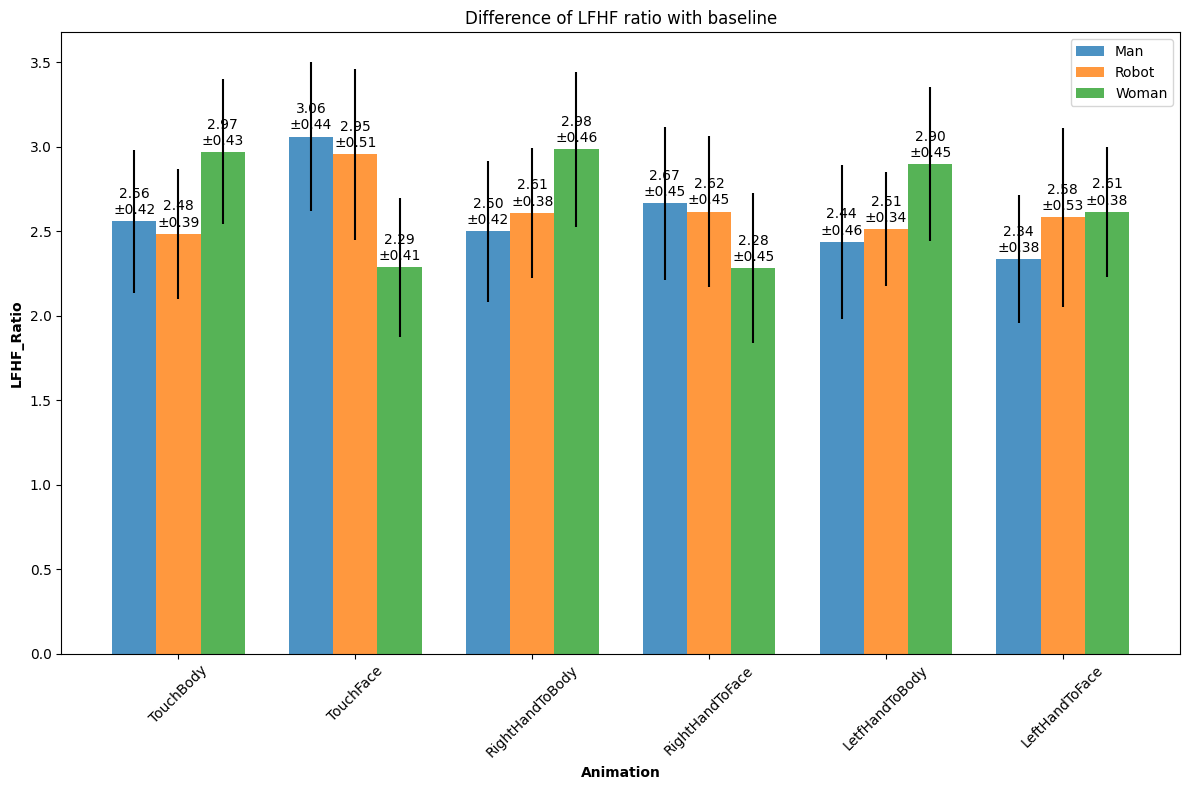

In [26]:
order = ['TouchBody', 'TouchFace', 'RightHandToBody', 'RightHandToFace', 'LetfHandToBody', 'LeftHandToFace']
man_stats = man_stats.reindex(order)
robot_stats = robot_stats.reindex(order)
woman_stats = woman_stats.reindex(order)

# Create bar graphs with reordered animations and mean and standard error values displayed on each bar in Thai
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
opacity = 0.8

# Positions of the bars on the x-axis
r1 = range(len(man_stats))
r2 = [p + bar_width for p in r1]
r3 = [p + bar_width * 2 for p in r1]

bars1 = ax.bar(r1, man_stats['mean'], bar_width, yerr=man_stats['sem'], label='Man', alpha=opacity)
bars2 = ax.bar(r2, robot_stats['mean'], bar_width, yerr=robot_stats['sem'], label='Robot', alpha=opacity)
bars3 = ax.bar(r3, woman_stats['mean'], bar_width, yerr=woman_stats['sem'], label='Woman', alpha=opacity)
ax.set_xlabel('Animation',fontweight = 'bold')
ax.set_ylabel('LFHF_Ratio' ,fontweight = 'bold')
ax.set_title('Difference of LFHF ratio with baseline')
ax.set_xticks([p + bar_width for p in range(len(man_stats))])
ax.set_xticklabels(man_stats.index, rotation=45)
ax.legend()

# Add the values on top of the bars
def add_values_to_bars(bars, stats):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        sem = stats.iloc[i]['sem']
        ax.annotate(f'{height:.2f}\n±{sem:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values_to_bars(bars1, man_stats)
add_values_to_bars(bars2, robot_stats)
add_values_to_bars(bars3, woman_stats)

plt.tight_layout()
plt.show()


จากผู้เข้าร่วมทดลองทั้งหมด 31 คน เป็นชาย 19 คน และ หญิง 12 คน
ผลสรุปได้ว่า จากแบบสอบถามในขณะเล่นเกมพบว่า
Man 
1.เมื่อ Avatar "Man" ทำท่าทางการจับใบหน้าด้วยสองมือ "TouchFace" จะมีความไม่สบายใจสูงที่สุดโดยมีค่าเฉลี่ยอยู่ที่ 3.48 และ Std error อยู่ที่ +-0.2
2.เมื่อ Avatar "Man" ทำท่าทางการจับตัวด้วยสองมือ "TouchBody" จะมีความไม่สบายใจสูงสุดรองลงมาโดยมีค่าเฉลี่ยอยู่ที่ 3.23 และ Std error อยู่ที่ +-0.24
3.Avatar "Man" เป็นสิ่งที่คนส่วนใหญ่กลัวมากที่สุดจากที่เห็นได้จากกราฟแท่ง ในหลายๆ Animation Avatar "Man" จะเป็นตัวละครที่ ผู้เข้าร่วมทดลองมีระดับความไม่สบายใจมากที่สุด

Robot
1.เมื่อ Avatar "Robot" ทำท่าทางการจับใบหน้าด้วยสองมือ "TouchFace" จะมีความไม่สบายใจสูงที่สุดโดยมีค่าเฉลี่ยอยู่ที่ 3.32 และ Std error อยู่ที่ +-0.21
2.เมื่อ Avatar "Robot" ทำท่าทางการจับตัวด้วยสองมือ "TouchBody" จะมีความไม่สบายใจสูงสุดรองลงมาโดยมีค่าเฉลี่ยอยู่ที่ 3.23 และ Std error อยู่ที่ +-0.24
4.Avatar "Robot" เป็นสิ่งที่คนส่วนใหญ่รู้สึกไม่สบายใจรองลงมาจากที่เห็นได้จากกราฟแท่ง ในหลายๆ Animation Avatar "Robot" จะเป็นตัวละครที่ ผู้เข้าร่วมทดลองมีระดับความไม่สบายใจรองลงมา

Woman
1.Avatar "Woman" เป็นสิ่งที่คนส่วนใหญ่รู้สึกไม่สบายใจน้อยที่สุดมาจากที่เห็นได้จากกราฟแท่ง ในหลายๆ Animation Avatar "Woman" จะเป็นตัวละครที่ ผู้เข้าร่วมทดลองมีระดับความไม่สบายใจน้อยที่สุด
2.เมื่อ Avatar "Woman" ทำท่าทางการจับใบหน้าด้วยสองมือ "TouchBody" จะมีความไม่สบายใจสูงที่สุดโดยมีค่าเฉลี่ยอยู่ที่ 3.03 และ Std error อยู่ที่ +-0.20
3.เมื่อ Avatar "Woman" ทำท่าทางการจับใบหน้าด้วยสองมือ "TouchFace" จะมีความไม่สบายใจสูงที่สุดโดยมีค่าเฉลี่ยอยู่ที่ 2.74 และ Std error อยู่ที่ +-0.24



จากผล HRV_LFHF เมื่อสอดคล้องกับแบบสอบถามที่เห็นได้ชัดเจนที่สุดคือ 
1.Avatar "Man"ใน Animation "TouchFace"  ที่สอดคล้องกับแบบสอบถามขณะเล่นเกม มีความตื่นเต้นและกดดันมากที่สุดโดยมีค่า HRV_LFHF mean อยู่ที่ 3.06 และ Std error อยู่ที่ +-0.44
2.Avatar "Man"ใน Animation "RightHandToFace"  ที่สอดคล้องกับแบบสอบถามขณะเล่นเกม มีความตื่นเต้นและกดดันมากที่สุดโดยมีค่า HRV_LFHF mean อยู่ที่ 2.67 และ Std error อยู่ที่ +-0.04
3.Avatar "Robot"ใน Animation "RightHandToFace" ที่สอดคล้องกับแบบสอบถามขณะเล่นเกม มีความตื่นเต้นและกดดันรองลงมาที่สุดโดยมีค่า HRV_LFHF mean อยู่ที่ 2.62 และ Std error อยู่ที่ +-0.45
4.Avatar "Woman" ใน Animation "TouchFace" และ "RightHandToFace" ที่สอดคล้องกับแบบสอบถามขณะเล่นเกม โดยทั้งคู่มีค่า HRV_LFHF mean ต่ำที่สุดอยู่ที่ 2.29 และ  2.28 ตามลำดับ

***สาเหตุที่ LFHF Ratio ของ Avatar "Woman" บางอันสูงกว่าของ Avatar "Man" เนื่องจากในการทดลองนี้มีผู้เข้าร่วมผู้ชายเยอะกว่าผู้หญิงซึ่งอาจมีส่วนที่ทำให้ค่า LFHF ratio สูงกว่า**
***สาเหตุที่ LFHF Ration ของ  Avatar "Robot" อยู่ในอันดับที่สองของทุก Animation เนื่องจากว่าผู้คนส่วนคิดว่า Robot นั้นไม่มีเพศ จึงอยู่ระหว่าง Avatar "Man" และ Avatar "Woman" ในทุก Animtion**

  


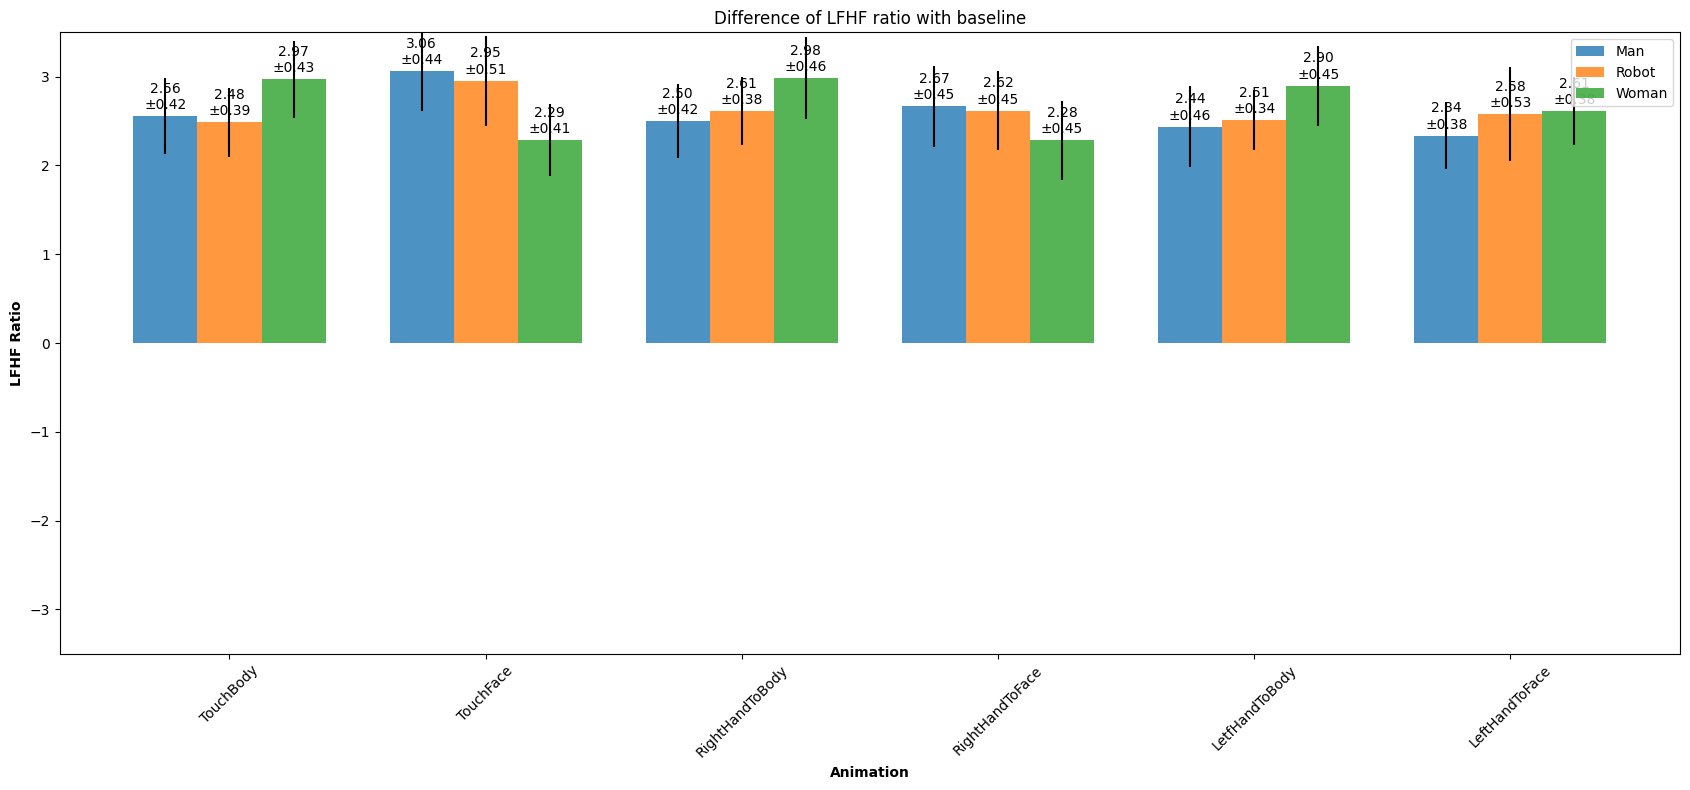

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data files
man_df = pd.read_csv('MeanLFHF/mean_HRV_LFHF_Man.csv')
robot_df = pd.read_csv('MeanLFHF/mean_HRV_LFHF_Robot.csv')
woman_df = pd.read_csv('MeanLFHF/mean_HRV_LFHF_Woman.csv')

# Calculate mean and standard error for each gesture for each avatar
man_stats = man_df.drop(columns='Participant').agg(['mean', 'sem']).transpose()
robot_stats = robot_df.drop(columns='Participant').agg(['mean', 'sem']).transpose()
woman_stats = woman_df.drop(columns='Participant').agg(['mean', 'sem']).transpose()

# Reorder the columns as requested
order = ['TouchBody', 'TouchFace', 'RightHandToBody', 'RightHandToFace', 'LetfHandToBody', 'LeftHandToFace']
man_stats = man_stats.reindex(order)
robot_stats = robot_stats.reindex(order)
woman_stats = woman_stats.reindex(order)

# Create bar graphs with reordered animations and mean and standard error values displayed on each bar in Thai
fig, ax = plt.subplots(figsize=(17, 8))

bar_width = 0.25
opacity = 0.8

# Positions of the bars on the x-axis
r1 = range(len(man_stats))
r2 = [p + bar_width for p in r1]
r3 = [p + bar_width * 2 for p in r1]

bars1 = ax.bar(r1, man_stats['mean'], bar_width, yerr=man_stats['sem'], label='Man', alpha=opacity)
bars2 = ax.bar(r2, robot_stats['mean'], bar_width, yerr=robot_stats['sem'], label='Robot', alpha=opacity)
bars3 = ax.bar(r3, woman_stats['mean'], bar_width, yerr=woman_stats['sem'], label='Woman', alpha=opacity)

ax.set_xlabel('Animation',fontweight = 'bold')
ax.set_ylabel('LFHF Ratio',fontweight = 'bold')
ax.set_title('Difference of LFHF ratio with baseline')
ax.set_xticks([p + bar_width for p in range(len(man_stats))])
ax.set_xticklabels(man_stats.index, rotation=45)
ax.legend()

# Set Y-axis range
ax.set_ylim(-3.5, 3.5)

# Add the values on top of the bars
def add_values_to_bars(bars, stats):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        sem = stats.iloc[i]['sem']
        ax.annotate(f'{height:.2f}\n±{sem:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values_to_bars(bars1, man_stats)
add_values_to_bars(bars2, robot_stats)
add_values_to_bars(bars3, woman_stats)

plt.tight_layout()
plt.show()
